In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('Test_fCbTej3_0j1gHmj.csv')
print(train.shape)
print(test.shape)

(49000, 2)
(21000, 1)


In [4]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [6]:
train.label.value_counts()

1    5514
7    5105
3    4999
2    4893
9    4871
0    4832
6    4813
4    4777
8    4777
5    4419
Name: label, dtype: int64

In [7]:
import os
import shutil

In [8]:
len(os.listdir('./Images/train'))

49000

In [9]:
!mkdir sample

In [10]:
for i in range(0,10):
    os.makedirs('./sample/'+str(i))

In [11]:
for index in train.index:
    for folder_name in range(0,10):
        if train.loc[index, 'label'] == int(os.path.basename('./sample/'+str(folder_name))):
            shutil.copy('./Images/train/'+str(train.loc[index, 'filename']), os.path.join('./sample/'+str(folder_name)+'/'))

In [12]:
for i in range(0,10): 
    print(len(os.listdir('./sample/'+str(i))))

4832
5514
4893
4999
4777
4419
4813
5105
4777
4871


In [13]:
os.makedirs('./sample/train')
os.makedirs('./sample/test')
os.makedirs('./sample/val')

In [14]:
for i in range(0,10):
    os.makedirs('./sample/train/'+str(i))
    os.makedirs('./sample/test/'+str(i))
    os.makedirs('./sample/val/'+str(i))

In [15]:
os.listdir('./sample/train/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [16]:
folder_list = [str(i)+'/' for i in range(0,10)]
folder_list

['0/', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/', '9/']

In [17]:
NEW_BASE = './sample/'

In [18]:
for folder_idx, folder in enumerate(folder_list):
    files = os.listdir(NEW_BASE + folder)
    folder_name = folder.split('/')[0]
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = NEW_BASE + folder + file
        if idx < n_train:
            shutil.move(file_name, NEW_BASE + "train/" + folder_name)
        elif idx < n_train + n_valid:
            shutil.move(file_name, NEW_BASE + "val/" + folder_name)
        else:
            shutil.move(file_name, NEW_BASE + "test/" + folder_name)

4832 2899 1208 725
5514 3308 1379 827
4893 2936 1223 734
4999 2999 1250 750
4777 2866 1194 717
4419 2651 1105 663
4813 2888 1203 722
5105 3063 1276 766
4777 2866 1194 717
4871 2923 1218 730


In [19]:
for i in range(0,10):
    os.rmdir('./sample/'+str(i))

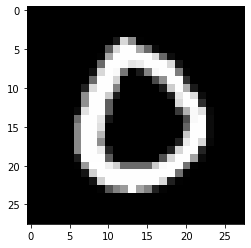

In [22]:
import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join('./sample/train/0/31.png'))
plt.imshow(test_image)

In [23]:
name_list = [str(i) for i in range(0, 10)]
name_list

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    './sample/train',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    classes=name_list   
)

val_batches = valid_gen.flow_from_directory(
    './sample/val',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    classes=name_list
)

test_batches = test_gen.flow_from_directory(
    './sample/test',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
    classes=name_list
)

Found 29399 images belonging to 10 classes.
Found 12250 images belonging to 10 classes.
Found 7351 images belonging to 10 classes.


In [25]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(32, 28, 28, 1)
[3. 0. 1. 7. 1. 6. 9. 1. 2. 1. 2. 1. 9. 5. 5. 8. 6. 7. 1. 1. 1. 2. 6. 7.
 2. 3. 2. 1. 8. 3. 2. 3.]
(32, 28, 28, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


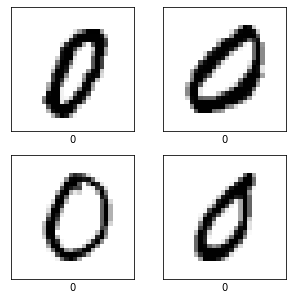

In [26]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = name_list[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + name_list[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

In [27]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(layers.Conv2D(128, (3,3), padding="same", activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [28]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.01)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [29]:

epochs = 30

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=5,
#     verbose=2
# )

history = model.fit(train_batches, validation_data=val_batches,
        #   callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/30
919/919 - 95s - loss: 0.2401 - accuracy: 0.9234 - val_loss: 0.1053 - val_accuracy: 0.9663 - 95s/epoch - 104ms/step
Epoch 2/30
919/919 - 84s - loss: 0.1032 - accuracy: 0.9682 - val_loss: 0.1048 - val_accuracy: 0.9722 - 84s/epoch - 91ms/step
Epoch 3/30
919/919 - 107s - loss: 0.0914 - accuracy: 0.9724 - val_loss: 0.1135 - val_accuracy: 0.9656 - 107s/epoch - 116ms/step
Epoch 4/30
919/919 - 97s - loss: 0.0730 - accuracy: 0.9790 - val_loss: 0.1047 - val_accuracy: 0.9719 - 97s/epoch - 106ms/step
Epoch 5/30
919/919 - 94s - loss: 0.0796 - accuracy: 0.9758 - val_loss: 0.1168 - val_accuracy: 0.9679 - 94s/epoch - 103ms/step
Epoch 6/30
919/919 - 94s - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0968 - val_accuracy: 0.9746 - 94s/epoch - 102ms/step
Epoch 7/30
919/919 - 89s - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0984 - val_accuracy: 0.9773 - 89s/epoch - 97ms/step
Epoch 8/30
919/919 - 82s - loss: 0.0612 - accuracy: 0.9820 - val_loss: 0.1068 - val_accuracy: 0.9747 - 82s/epoch - 89m

In [30]:
# evaluate on test data
model.evaluate(test_batches, verbose=2)

230/230 - 9s - loss: 0.3338 - accuracy: 0.9656 - 9s/epoch - 41ms/step


[0.33382999897003174, 0.9655829071998596]

In [31]:
# make some predictions
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 ... 9 9 9]


In [34]:
test_batches[100][1]

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
      dtype=float32)

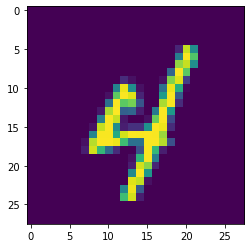

In [36]:
plt.imshow(test_batches[100][0][0].reshape(28,28))

In [37]:
pred1 = model.predict(test_batches[100][0][0].reshape(1,28,28))
pred1 = tf.nn.softmax(pred1)
label1 = np.argmax(pred1, axis=1)

In [38]:
label1

array([4], dtype=int64)

In [41]:
test_gen_new = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_preprocessed = test_gen_new.flow_from_directory(
    './Images',
    class_mode='sparse',
    target_size=(28, 28),
    color_mode="grayscale",
    shuffle=False,
    classes=['test']
)

Found 21000 images belonging to 1 classes.


In [42]:
prediction_new = model.predict(test_preprocessed)

In [43]:
prediction_new = tf.nn.softmax(prediction_new)
label_new = np.argmax(prediction_new, axis=1)

In [44]:
submission = pd.read_csv('sample_submission_npBPSZB.csv')
submission.head()

,filename,label
0,49000.png,0
1,49001.png,0
2,49002.png,0
3,49003.png,0
4,49004.png,0


In [45]:
submission['label'] = label_new

In [46]:
submission.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [47]:
submission.to_csv("submission.csv", index=False, header=True)